# C2: BUILDING BLOCKS OF ANN

## Feedforward Process

The feedforward process depicts how information flows forward through the network.

- **Steps**:
    1. **Input layer**: Raw data is given to the network as input features (e.g., $x_1, x_2, ..., x_n$).
    2. **Weighted sum**: Each input is multiplied by a weight and added with a bias.  
       Formula:  
       $\mathrm{z} = \sum(w_i \cdot x_i) + b$
    3. **Activation function**:  
       - The weighted sum $z$ is passed through a non-linear function (e.g., ReLU, Sigmoid, TanH).  
       - This determines the neuron's output $a$.
    4. **Hidden layers**: The output from one layer becomes the input to the next layer, repeating the weighted sum and activation steps.
    5. **Output layer**: The final layer produces predictions (e.g., classification, probability, regression).
    6. **No feedback**:  
       - In feedforward networks, there is no feedback loop.  
       - Data flows in only one direction.  
       - No error correction happens here (error correction is handled during backpropagation).

## Fully Connected Layer (Dense Layer)

- A fully connected (dense) layer is a layer in which every neuron is connected to every neuron in the next layer.

- **Working**:
    - Each input is multiplied by a weight, added with a bias, and then passed through an activation function.  
    - $y = f(Wx + b)$

- **Role**:
    - Combines features learned from previous layers.
    - Captures global patterns since all inputs affect all outputs.
    - Commonly used at the end of CNNs for classification tasks.

- **Characteristics**:
    - Dense connections between layers.
    - Very high number of parameters.
    - Can lead to overfitting if the network is too large.
    - Requires regularization techniques (e.g., Dropout, L2 regularization) to prevent overfitting.

## Activation Functions

- **Definition**: An activation function decides whether a neuron should be activated, i.e., whether it should pass information forward.  
- They introduce **non-linearity**, allowing the network to learn complex patterns.

- **Common activation functions**:
    - **Sigmoid**: Outputs values between 0 and 1. Good for probabilities, but suffers from vanishing gradients.
    - **ReLU** (Rectified Linear Unit): $f(x) = \max(0, x)$. Simple and effective, helps avoid vanishing gradient.
    - **TanH**: Outputs values between -1 and 1. Zero-centered, but still suffers from vanishing gradient.
    - **Softmax**: Converts outputs into a probability distribution for multi-class classification.

## Softmax Function

- **Definition**: Softmax is an activation function that converts a vector of raw values into a probability distribution.

- **Formula**:
    - For an output vector $z = [z_1, z_2, ..., z_n]$:  
      $Softmax(z_i) = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}$
    - Each output lies between 0 and 1.

- **Key points**:
    - Used mostly in the output layer of multi-class classification problems.
    - Ensures all probabilities sum to 1.
    - Amplifies differences: the largest input gets the highest probability.
    - Works well when classes are mutually exclusive.


In [1]:
# Assume an image is given to find whats the animal in the image

import numpy as np 

def softmax(x):
    exp_vals = np.exp(x- np.max(x))
    return exp_vals / np.sum(exp_vals)

# weights for the deciding animal 
cat = 2.0
dog = 1.0
horse = 0.1

scores = [cat, dog, horse]
prob = softmax(scores)
print("Probabilities: ", prob)

print(f"{prob[0] * 100: .2f}% cat")
print(f"{prob[1] * 100: .2f}% dog")
print(f"{prob[2] * 100: .2f}% horse")

Probabilities:  [0.65900114 0.24243297 0.09856589]
 65.90% cat
 24.24% dog
 9.86% horse


## Backpropagation

- **Definition**: Backpropagation is a learning algorithm used to update weights and biases in neural networks.
- It minimizes the loss function by propagating the error backward through the network.

- **Steps**:
    1. **Forward pass**: Compute predictions by passing inputs through the network.
    2. **Loss calculation**: Compare predictions with true labels using a loss function.
    3. **Backward pass**:  
        - Compute the gradient of the loss with respect to each weight and bias using the **chain rule of calculus**.  
        - This shows how much each parameter contributed to the error.
    4. **Weight update**:  
        - Update the parameters using an optimizer.  
        - Formula:  
          $\mathrm{w} = w - \eta \cdot \frac{\partial L}{\partial w}$  
          where $\eta$ is the learning rate.

- **Key ideas**:
    - Works iteratively to reduce error.
    - Uses the chain rule to efficiently compute gradients layer by layer.
    - Central to training deep neural networks.

- **Notes**:
    - Requires differentiable activation functions.
    - Commonly paired with optimizers like SGD, Adam, RMSProp.
    - Can suffer from **vanishing/exploding gradients**, especially in very deep networks.

## Cross-Entropy Loss

- **Definition**: Cross-entropy loss (also called **log loss**) measures the difference between the true probability distribution and the predicted probability distribution.
- A lower loss means better predictions.

- **Formulas**:
    - **Binary classification**:  
      $\mathrm{L} = - \big[ y \cdot \log(p) + (1 - y) \cdot \log(1 - p) \big]$  
      - $y \in \{0,1\}$ = true label  
      - $p$ = predicted probability of class 1
    - **Multi-class classification**:  
      $\mathrm{L} = - \sum_{i=1}^C y_i \cdot \log(p_i)$  
      - $C$ = number of classes  
      - $y_i = 1$ if class $i$ is correct, else 0  
      - $p_i$ = predicted probability for class $i$

- **Use cases**:
    - Penalizes wrong **confident predictions** heavily.
    - Encourages the model to assign high probability to the correct class.

- **Behavior**:
    - If prediction is confident **and correct** → loss is very small.
    - If prediction is confident **and wrong** → loss is very large.
    - If prediction is uncertain (close to uniform) → moderate loss.


In [2]:
# true label 1 = dog, 0 = cat
y_true = [0,1]

# predicted probabilities from softmax
y_pred = [0.25, 0.75]

# cross entropy loss
loss = -np.sum(np.array(y_true) * np.log(y_pred))
print(f"Loss:{loss*100: .2f}%")

Loss: 28.77%


Epoch 1/5


/home/mht/.my-env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8221 - loss: 0.5013 - val_accuracy: 0.8602 - val_loss: 0.3887
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8644 - loss: 0.3697 - val_accuracy: 0.8702 - val_loss: 0.3590
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8779 - loss: 0.3324 - val_accuracy: 0.8687 - val_loss: 0.3532
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8848 - loss: 0.3110 - val_accuracy: 0.8703 - val_loss: 0.3491
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8901 - loss: 0.2950 - val_accuracy: 0.8768 - val_loss: 0.3422
313/313 - 0s - 1ms/step - accuracy: 0.8706 - loss: 0.3571
Test accuracy: 0.8706
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step


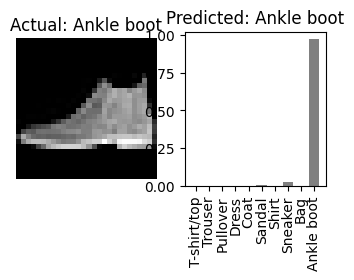

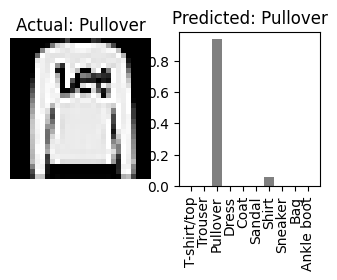

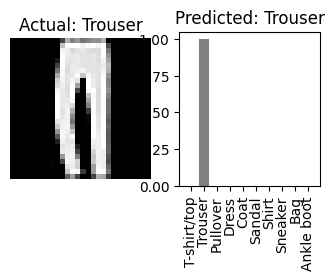

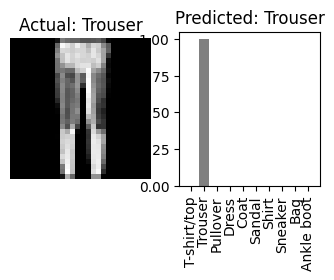

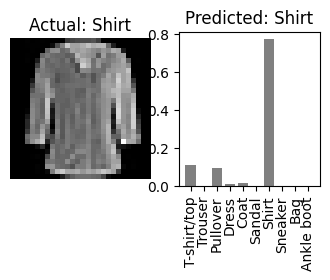

In [ ]:
## Prediction on MNIST Fashion data to classify dress types

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Class names for labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Normalize data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (28x28 → 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Build model
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")  # 10 classes
])

# Compile
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Make predictions
predictions = model.predict(x_test)

# Function to display prediction vs actual
def show_prediction(i):
    plt.figure(figsize=(4, 2))

    # Show image
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(f"Actual: {class_names[y_test[i]]}")

    # Show prediction
    plt.subplot(1, 2, 2)
    plt.bar(range(10), predictions[i], color="gray")
    plt.xticks(range(10), class_names, rotation=90)
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}")

    plt.show()

# Show first 5 predictions
for i in range(5):
    show_prediction(i)
